In [2]:
# Import Dependecies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
trainPath = 'train.csv'
testPath = 'test.csv'

In [4]:
train = pd.read_csv(trainPath)
test = pd.read_csv(testPath)

print(train.head(5))

   id   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0  680.0       25.0      0.50     0.38     0.38   0.50              94.6   
1   1  514.0       25.0      0.50     0.25     0.50   0.63              77.4   
2   2  431.0       12.5      0.25     0.38     0.50   0.63              77.4   
3   3  656.0       25.0      0.50     0.38     0.38   0.50              94.6   
4   4  594.0       25.0      0.50     0.25     0.50   0.75              94.6   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              57.2                  79.0              68.2              33.0   
1              46.8                  64.7              55.8              27.0   
2              46.8                  64.7              55.8              27.0   
3              57.2                  79.0              68.2              33.0   
4              57.2                  79.0              68.2              33.0   

   AverageOfLowerTRange  Raining

<Figure size 2000x2000 with 0 Axes>

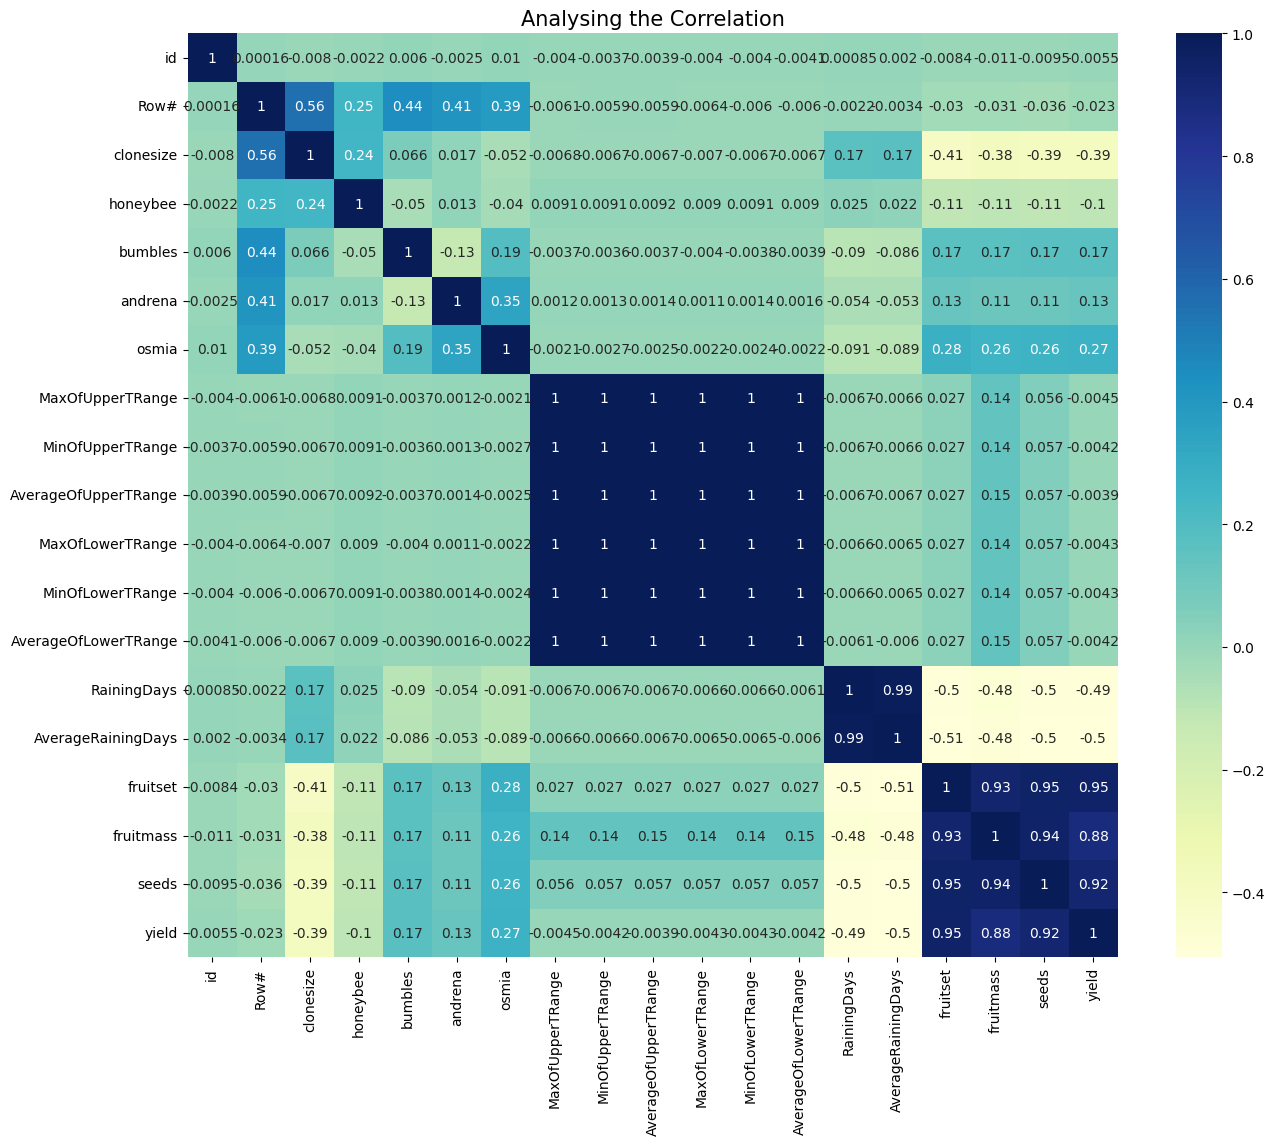

In [5]:
# Analyze Datasets and find relation among all the features
plt.figure(figsize=(20,20))
corr = train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Analysing the Correlation', fontsize=15)
plt.show()

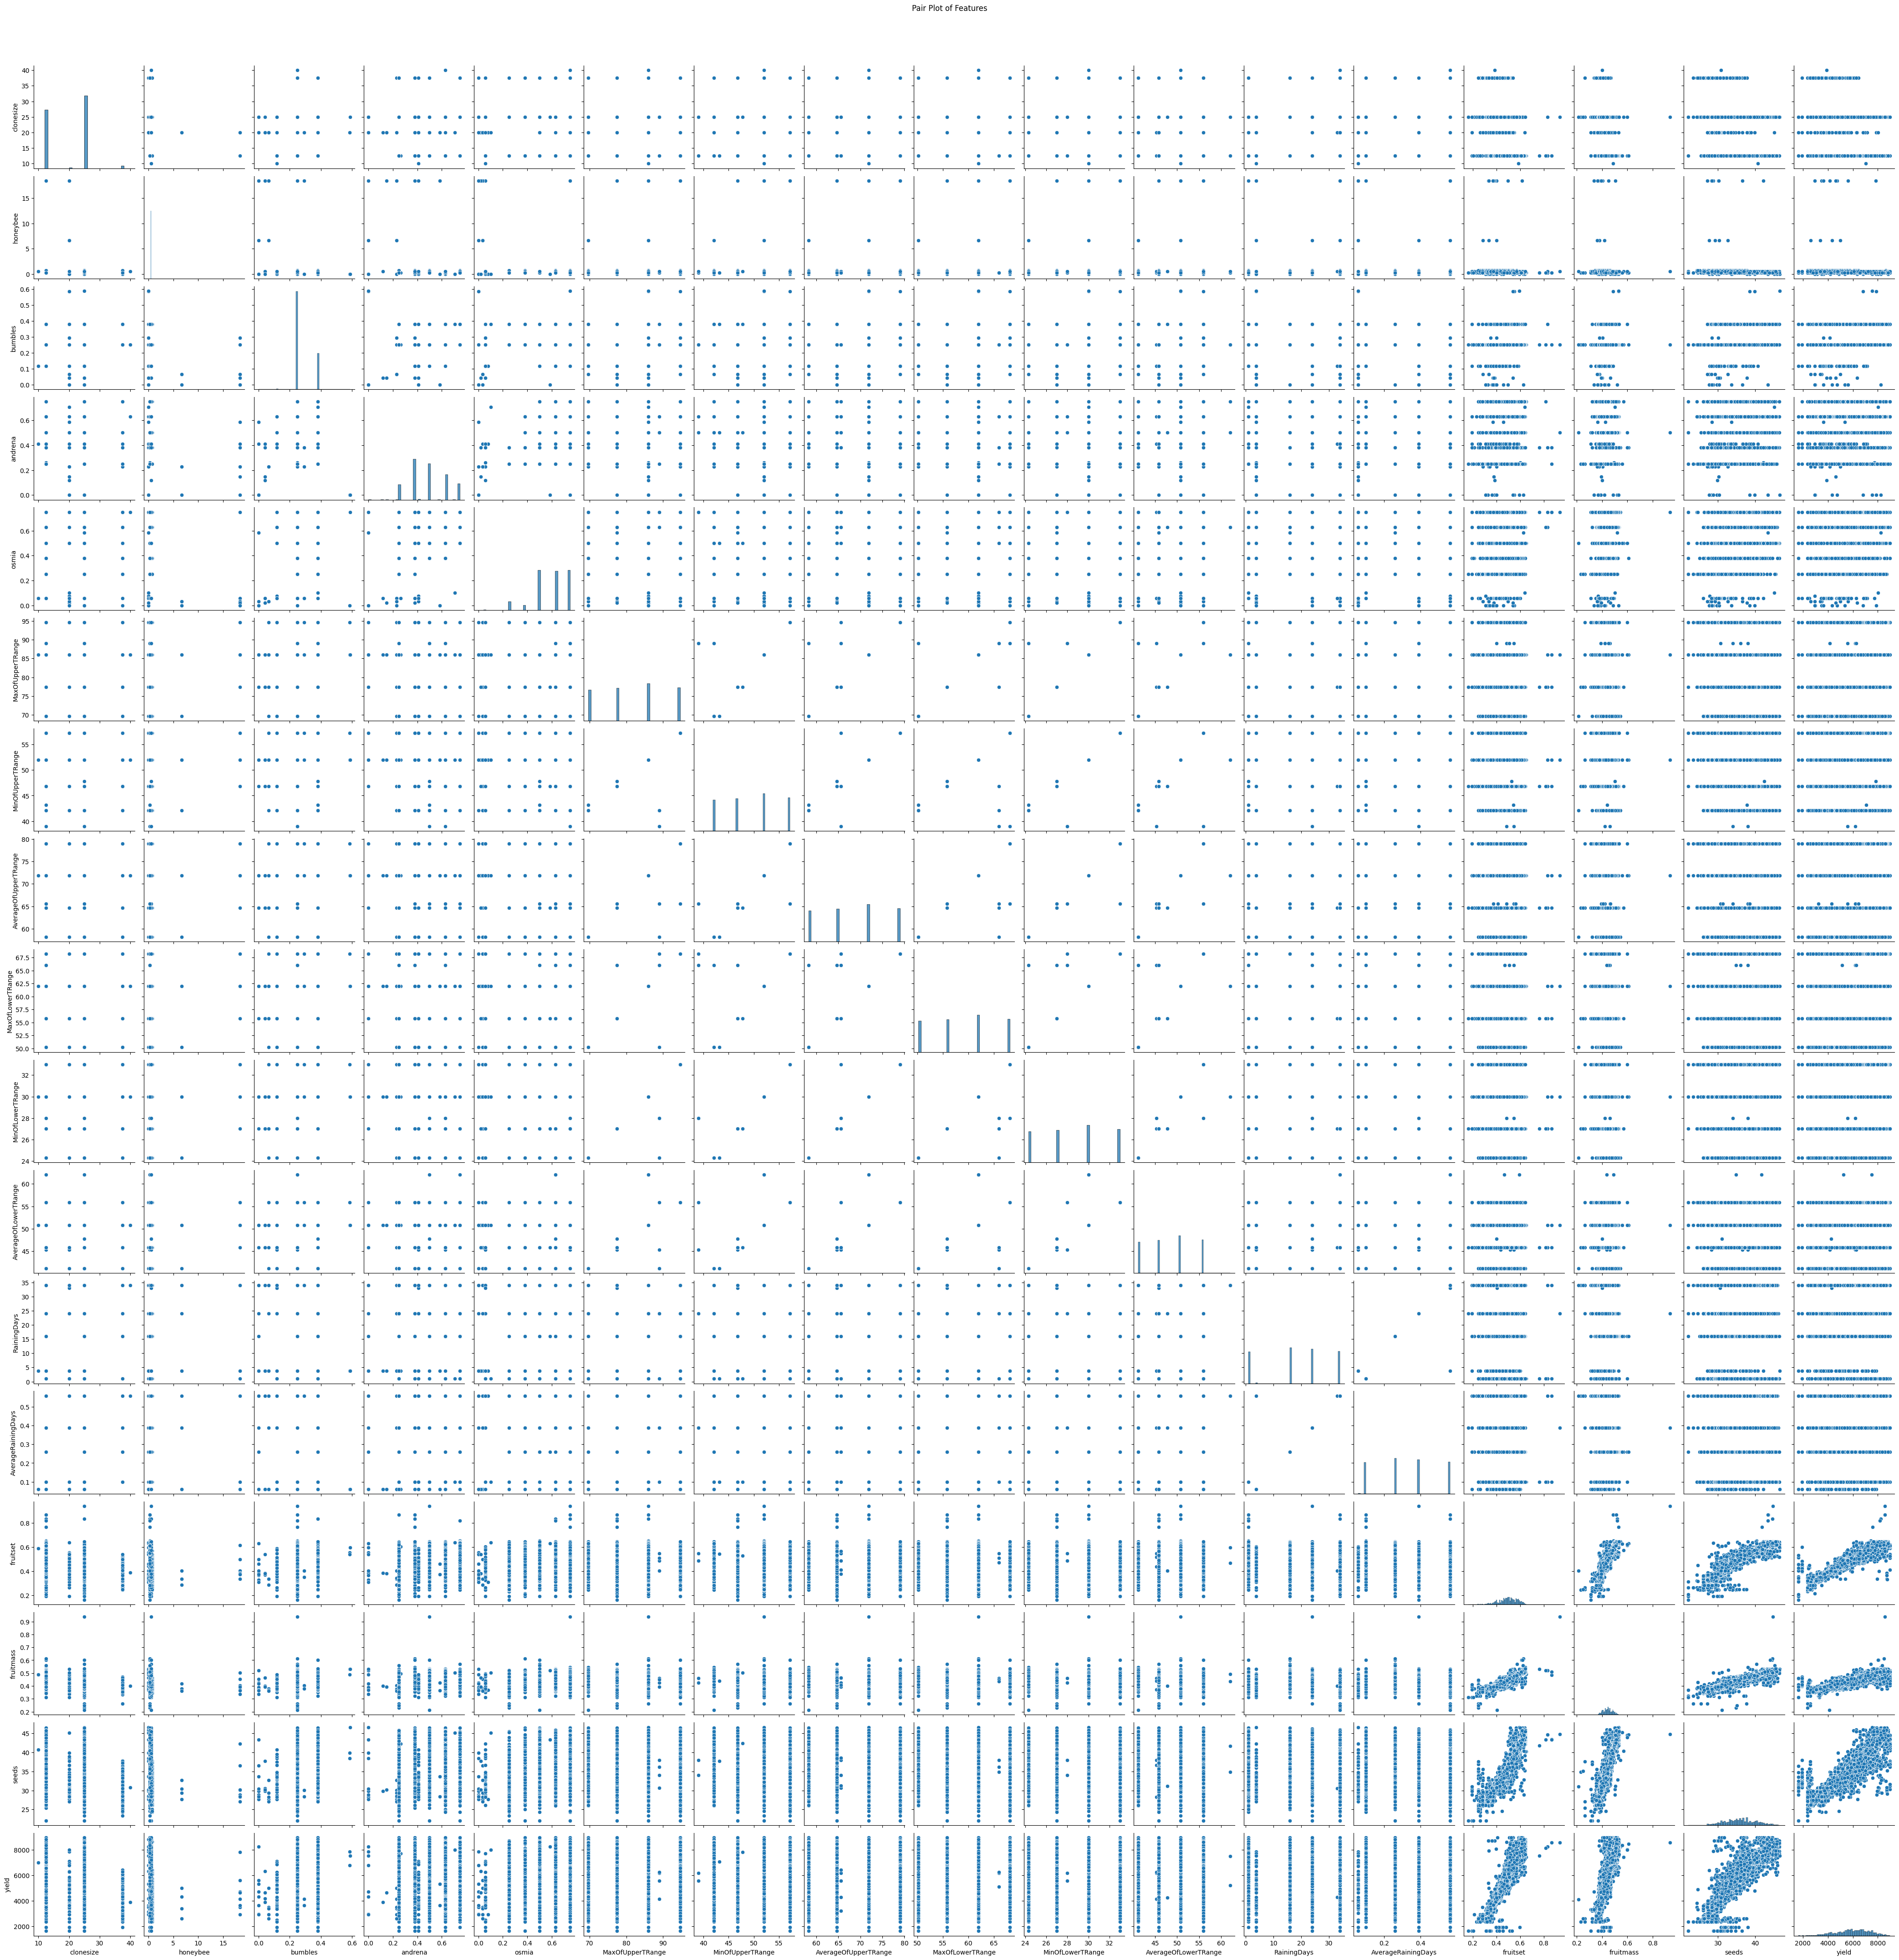

In [6]:
# Select relevant features for the pair plot
features = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 
            'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 
            'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 
            'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 
            'seeds', 'yield']

# Create a pair plot
sns.pairplot(train[features])
plt.suptitle('Pair Plot of Features', y=1.02)  # Adjust title position
plt.show()

### ***Preprocessing Data***
> *Outlier Detection and Remooving*

> *Normalization Data*

> *Feature Selection*

> *Feature Extraction*

In [7]:
# Data Overview: Understanding Data
# Get basic information about the datasets
print(train.info())
# print(test.info())

# Summary statistics for numerical columns
print(train.describe())
# print(test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [8]:
# Handling missing Value if exist
# Check for missing values
print(train.isnull().sum())
# print(test.isnull().sum())

# Optionally fill or drop missing values by using median, mean, max, etc
train.fillna(train.median(), inplace=True)
test.fillna(test.median(), inplace=True)


id                      0
Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64


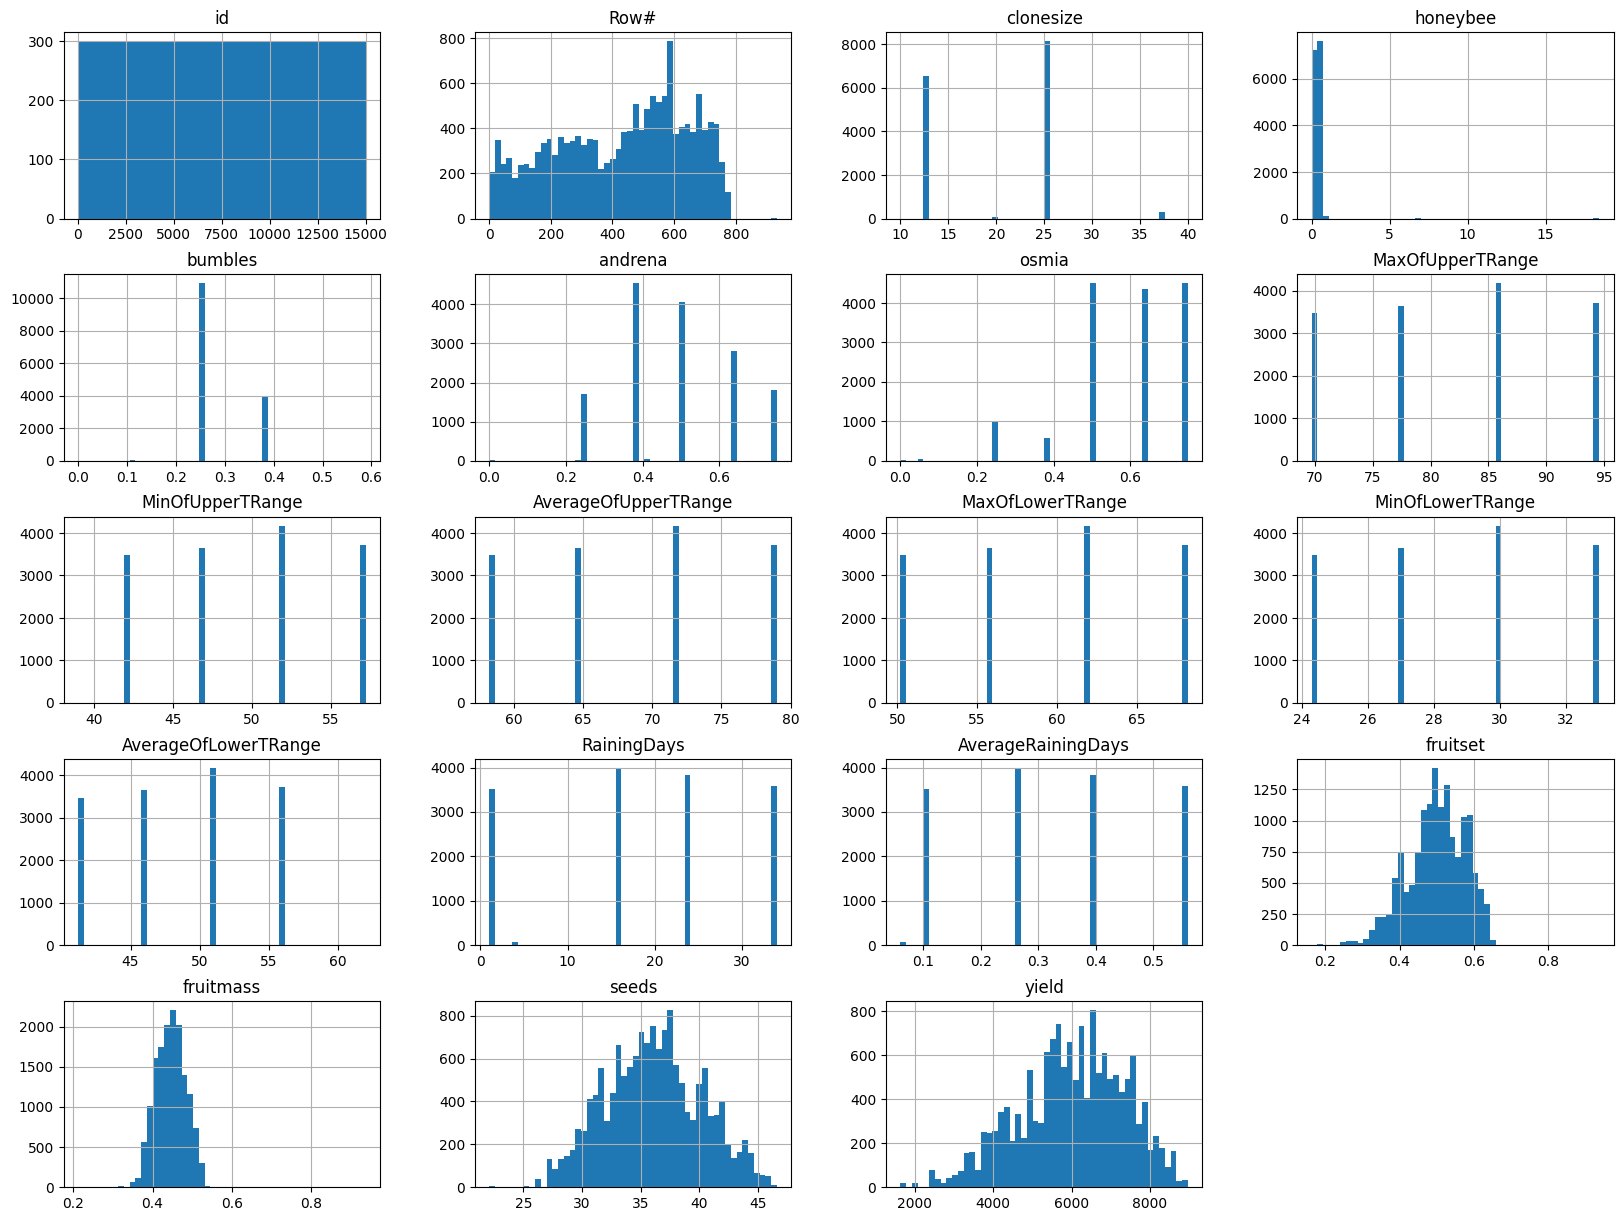

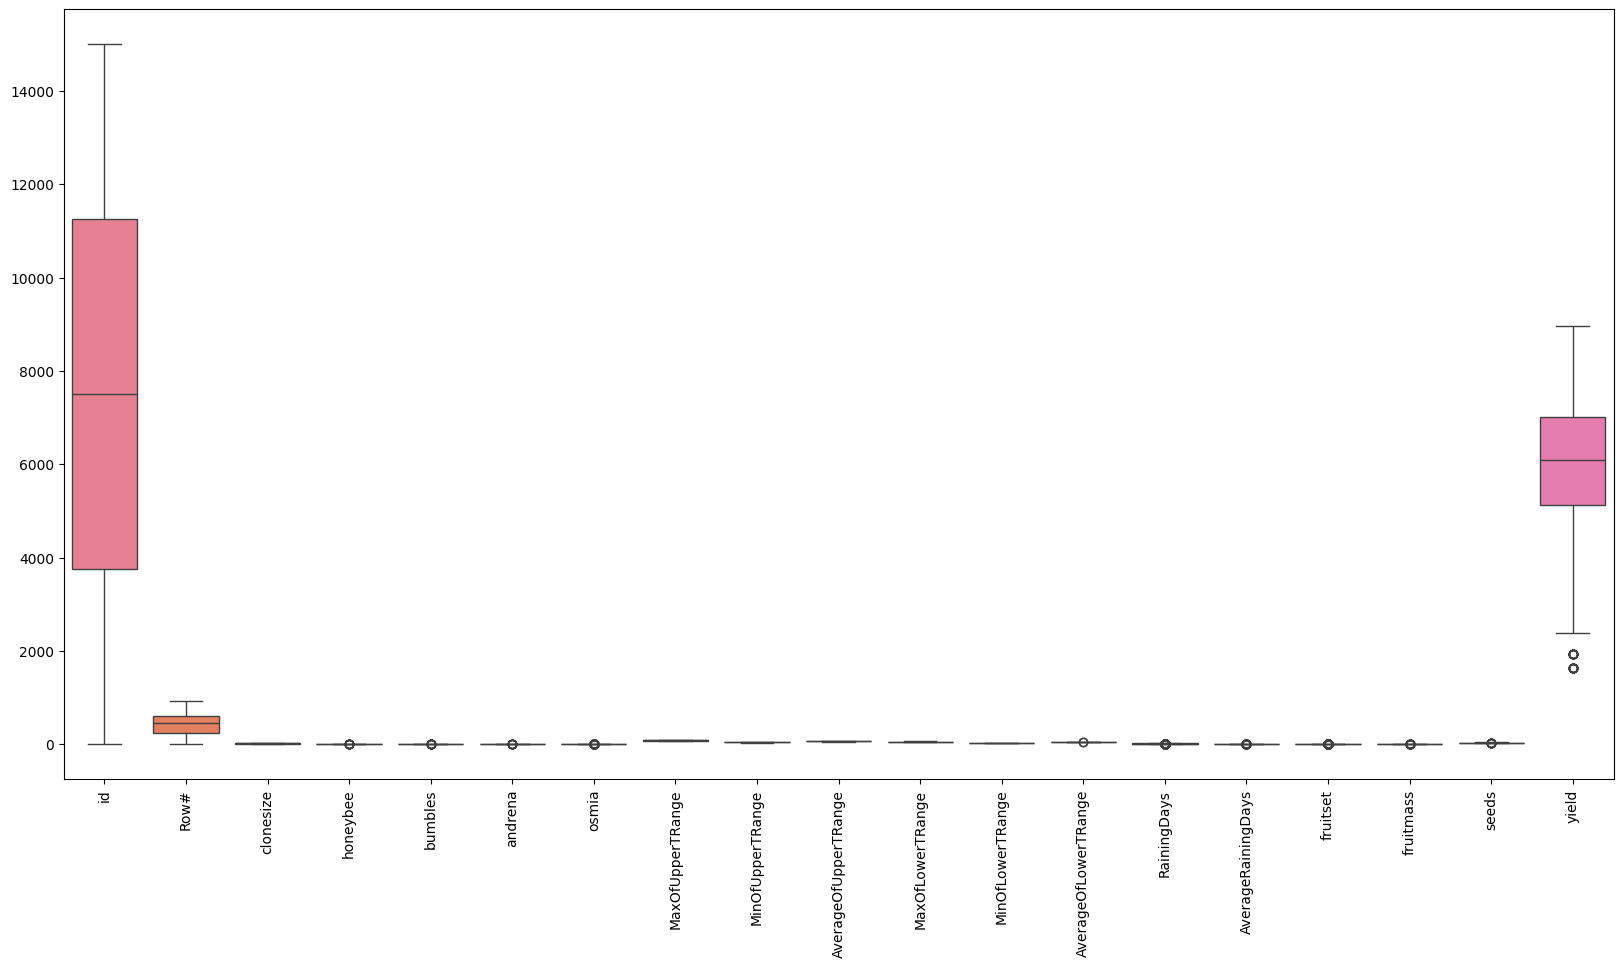

In [9]:
# Visualzation Data Distribution
# Plot histograms for numerical features in the training set
train.hist(bins=50, figsize=(20, 15))
plt.show()

# Visualize distribution using boxplots
plt.figure(figsize=(20, 10))
sns.boxplot(data=train)
plt.xticks(rotation=90)
plt.show()


In [10]:
# Use Z-score for outliers
# Z-score calculation for each feature in train set
z_scores_train = stats.zscore(train.select_dtypes(include=['float64', 'int64']))

# Define a threshold for the Z-score (e.g., 3)
threshold = 3

# Identify outliers (data points where the Z-score exceeds the threshold)
outliers_train = (abs(z_scores_train) > threshold).sum(axis=1)

# Train data points that are outliers
train_outliers = train[outliers_train > 0]
print(f"Number of outliers in train set: {len(train_outliers)}")

# Similar process for test set
z_scores_test = stats.zscore(test.select_dtypes(include=['float64', 'int64']))
outliers_test = (abs(z_scores_test) > threshold).sum(axis=1)
test_outliers = test[outliers_test > 0]
print(f"Number of outliers in test set: {len(test_outliers)}")


Number of outliers in train set: 193
Number of outliers in test set: 105


In [11]:
# IQR (Interquartile Range) Method
# Compute IQR for each feature
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers based on IQR for the train set
outliers_train_iqr = ((train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))).sum(axis=1)
train_outliers_iqr = train[outliers_train_iqr > 0]
print(f"Number of IQR-based outliers in train set: {len(train_outliers_iqr)}")

# Similar process for test set
Q1_test = test.quantile(0.25)
Q3_test = test.quantile(0.75)
IQR_test = Q3_test - Q1_test
outliers_test_iqr = ((test < (Q1_test - 1.5 * IQR_test)) | (test > (Q3_test + 1.5 * IQR_test))).sum(axis=1)
test_outliers_iqr = test[outliers_test_iqr > 0]
print(f"Number of IQR-based outliers in test set: {len(test_outliers_iqr)}")


Number of IQR-based outliers in train set: 3764
Number of IQR-based outliers in test set: 2491


In [12]:
# # Plot boxplot to show outliers for a feature in train dataset
# plt.figure(figsize=(10, 5))
# sns.boxplot(train[features])  # replace 'feature_name' with the actual feature
# plt.show()

In [13]:
# # Option 1: Remove outliers
# train_cleaned = train[(outliers_train == 0)]
# test_cleaned = test[(outliers_test == 0)]

# Option 2: Replace outliers with median values
# train_no_outliers = train.copy()
# train_no_outliers[outliers_train > 0] = train.median()
# Copy the DataFrame
train_no_outliers = train.copy()

# Replace outliers with median values (cast median to the appropriate type for each column)
for col in train_no_outliers.columns:
    if train_no_outliers[col].dtype == 'int64':
        train_no_outliers.loc[outliers_train > 0, col] = int(train[col].median())
    elif train_no_outliers[col].dtype == 'float64':
        train_no_outliers.loc[outliers_train > 0, col] = train[col].median()


In [14]:
# Reevalute
# Re-check summary statistics
print(train_no_outliers.describe())
# print(test_cleaned.describe())


                 id          Row#     clonesize      honeybee       bumbles  \
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000   
mean    7499.500067    428.453600     19.811667      0.382391      0.284406   
std     4306.812988    210.096874      6.597722      0.128706      0.057453   
min        0.000000      0.000000     12.500000      0.000000      0.117000   
25%     3794.750000    255.000000     12.500000      0.250000      0.250000   
50%     7499.000000    468.000000     25.000000      0.500000      0.250000   
75%    11209.250000    596.000000     25.000000      0.500000      0.380000   
max    14999.000000    933.000000     37.500000      0.750000      0.380000   

            andrena         osmia  MaxOfUpperTRange  MinOfUpperTRange  \
count  15000.000000  15000.000000       15000.00000      15000.000000   
mean       0.490371      0.593553          82.30790         49.754040   
std        0.147750      0.139561           9.11601          5.527612

In [45]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np


In [53]:
# Separate the features (X) and target variable (y) for the train dataset
X_train = train_no_outliers.drop(['id', 'yield', 'Row#'], axis=1)  # Replace 'target_column' with your actual target column name
y_train = train_no_outliers['yield']

# Do the same for the test dataset
X_test = test.drop(['id', 'yield', 'Row#'], axis=1, errors='ignore')  # 'target_column' won't be present in the test set
y_test = test['target_column'] if 'target_column' in test.columns else None

# Split the training data into train and validation sets (optional)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [54]:
# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=150, learning_rate=0.08, max_depth=5, random_state=42)

# Train the model
gb_model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
gb_val_predictions = gb_model.predict(X_val_split)

# Evaluate the model
gb_mse = mean_squared_error(y_val_split, gb_val_predictions)
gb_r2 = r2_score(y_val_split, gb_val_predictions)

print(f"Gradient Boosting Regressor MSE: {gb_mse}")
print(f"Gradient Boosting Regressor R² Score: {gb_r2}")


Gradient Boosting Regressor MSE: 165933.77366449838
Gradient Boosting Regressor R² Score: 0.9084260145385001


In [55]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=150, learning_rate=0.08, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train_split, y_train_split)

# Make predictions on the validation set
xgb_val_predictions = xgb_model.predict(X_val_split)

# Evaluate the model
xgb_mse = mean_squared_error(y_val_split, xgb_val_predictions)
xgb_r2 = r2_score(y_val_split, xgb_val_predictions)

print(f"XGBoost Regressor MSE: {xgb_mse}")
print(f"XGBoost Regressor R² Score: {xgb_r2}")


XGBoost Regressor MSE: 165719.37263421027
XGBoost Regressor R² Score: 0.9085443361821111


In [56]:
# Gradient Boosting - Validation MAE
gb_mae = mean_absolute_error(y_val_split, gb_val_predictions)
print(f"Gradient Boosting Regressor MAE: {gb_mae}")

# XGBoost - Validation MAE
xgb_mae = mean_absolute_error(y_val_split, xgb_val_predictions)
print(f"XGBoost Regressor MAE: {xgb_mae}")


Gradient Boosting Regressor MAE: 252.79738911192368
XGBoost Regressor MAE: 253.10839920377603


In [57]:
# Generate predictions on the test set using Gradient Boosting
gb_test_predictions = gb_model.predict(X_test)

# Generate predictions on the test set using XGBoost
xgb_test_predictions = xgb_model.predict(X_test)

# Output the first few predictions as an example
print("Gradient Boosting Predictions on Test Set:", gb_test_predictions[:5])
print("XGBoost Predictions on Test Set:", xgb_test_predictions[:5])


Gradient Boosting Predictions on Test Set: [6298.78304012 6887.66065102 6967.3178838  7385.97833168 6664.92013808]
XGBoost Predictions on Test Set: [6202.4243 6888.244  6860.6714 7373.7515 6634.0586]


In [58]:
# Create a DataFrame to store predictions
test_predictions_df = pd.DataFrame({
    'id': test['id'],
    'XGBoost_Predictions': xgb_test_predictions
})

test_predictions_df1 = pd.DataFrame({
    'id': test['id'],
    'GradientBoosting_Predictions': gb_test_predictions
})

# Save the predictions to a CSV file
test_predictions_df.to_csv('test_predictions.csv', index=False)
test_predictions_df1.to_csv('test_predictions1.csv', index=False)

print("Test predictions have been saved to 'test_predictions.csv'.")


Test predictions have been saved to 'test_predictions.csv'.


Gradient Boosting Validation MSE: 166386.99263967425
Gradient Boosting Validation MAE: 251.85243988886228
Gradient Boosting Validation R²: 0.9081758962718744
XGBoost Validation MSE: 166494.09541399163
XGBoost Validation MAE: 252.02262544197916
XGBoost Validation R²: 0.9081167893903661
Gradient Boosting CV MSE: 142198.3661031881
XGBoost CV MSE: 143644.12650295557


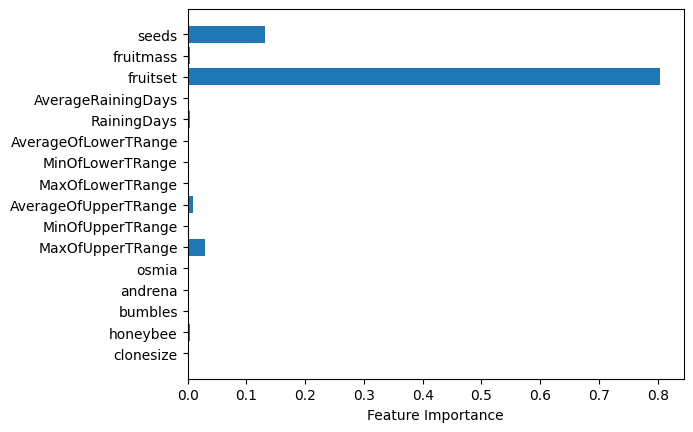

Test predictions have been saved to 'test_predictions.csv'.


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load your train and test datasets
train_df = pd.read_csv('train.csv')  # Replace with your train file path
test_df = pd.read_csv('test.csv')  # Replace with your test file path

# Preprocessing and Outlier Handling
train_no_outliers = train_df.copy()

# Replace 'target_column' with the actual target column name in your dataset
X_train = train_no_outliers.drop(['id', 'yield', 'Row#'], axis=1)
y_train = train_no_outliers['yield']

# Prepare test data (target column might not be in the test set)
X_test = test_df.drop(['id', 'Row#'], axis=1, errors='ignore')

# Split train set into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize models with regularization
gb_model = GradientBoostingRegressor(
    n_estimators=500,  # Increase number of trees
    learning_rate=0.05,  # Decrease learning rate
    max_depth=3,  # Limit depth of trees
    min_samples_split=5,  # Increase min samples to split nodes
    min_samples_leaf=4,  # Increase min samples per leaf node
    random_state=42
)

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    reg_alpha=0.1,  # L1 regularization (lasso)
    reg_lambda=0.1,  # L2 regularization (ridge)
    random_state=42
)

# Train models
gb_model.fit(X_train_split, y_train_split)
xgb_model.fit(X_train_split, y_train_split)

# Make predictions on validation set
gb_val_predictions = gb_model.predict(X_val_split)
xgb_val_predictions = xgb_model.predict(X_val_split)

# Evaluate on validation set
gb_val_mse = mean_squared_error(y_val_split, gb_val_predictions)
gb_val_mae = mean_absolute_error(y_val_split, gb_val_predictions)
gb_val_r2 = r2_score(y_val_split, gb_val_predictions)

xgb_val_mse = mean_squared_error(y_val_split, xgb_val_predictions)
xgb_val_mae = mean_absolute_error(y_val_split, xgb_val_predictions)
xgb_val_r2 = r2_score(y_val_split, xgb_val_predictions)

print("Gradient Boosting Validation MSE:", gb_val_mse)
print("Gradient Boosting Validation MAE:", gb_val_mae)
print("Gradient Boosting Validation R²:", gb_val_r2)

print("XGBoost Validation MSE:", xgb_val_mse)
print("XGBoost Validation MAE:", xgb_val_mae)
print("XGBoost Validation R²:", xgb_val_r2)

# Cross-validation to check generalization
gb_cv_scores = cross_val_score(gb_model, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')
xgb_cv_scores = cross_val_score(xgb_model, X_train_split, y_train_split, cv=5, scoring='neg_mean_squared_error')

print("Gradient Boosting CV MSE:", -np.mean(gb_cv_scores))
print("XGBoost CV MSE:", -np.mean(xgb_cv_scores))

# Feature Importance Plot for XGBoost
xgb_feature_importances = xgb_model.feature_importances_
plt.barh(X_train.columns, xgb_feature_importances)
plt.xlabel('Feature Importance')
plt.show()

# Generate predictions on test set
gb_test_predictions = gb_model.predict(X_test)
xgb_test_predictions = xgb_model.predict(X_test)

# Create a DataFrame to store predictions
test_predictions_df = pd.DataFrame({
    'id': test['id'],
    'XGBoost_Predictions': xgb_test_predictions
})

test_predictions_df1 = pd.DataFrame({
    'id': test['id'],
    'GradientBoosting_Predictions': gb_test_predictions
})

# Save the predictions to a CSV file
test_predictions_df.to_csv('test_predictions.csv', index=False)
test_predictions_df1.to_csv('test_predictions1.csv', index=False)

print("Test predictions have been saved to 'test_predictions.csv'.")


In [60]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.feature_selection import SelectFromModel
# from scipy.stats import uniform, randint
# import matplotlib.pyplot as plt

# # Load your train and test datasets
# train_df = pd.read_csv('train.csv')  # Replace with your train file path
# test_df = pd.read_csv('test.csv')  # Replace with your test file path

# # Preprocessing (ensure data cleaning is done here)

# # Define features and target
# X_train = train_df.drop(['id', 'yield'], axis=1)
# y_train = train_df['yield']
# X_test = test_df.drop('id', axis=1, errors='ignore')

# # Split train into training and validation sets
# X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# # Hyperparameter grids for tuning
# gb_param_grid = {
#     'n_estimators': randint(100, 1000),
#     'learning_rate': uniform(0.01, 0.3),
#     'max_depth': randint(2, 6),
#     'min_samples_split': randint(2, 10),
#     'min_samples_leaf': randint(1, 10)
# }

# xgb_param_grid = {
#     'n_estimators': randint(100, 1000),
#     'learning_rate': uniform(0.01, 0.3),
#     'max_depth': randint(2, 6),
#     'reg_alpha': uniform(0, 1),  # L1 regularization
#     'reg_lambda': uniform(0.1, 1),  # L2 regularization
# }

# # Randomized search for both models
# gb_model = GradientBoostingRegressor(random_state=42)
# xgb_model = XGBRegressor(random_state=42)

# gb_random_search = RandomizedSearchCV(gb_model, gb_param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
# xgb_random_search = RandomizedSearchCV(xgb_model, xgb_param_grid, n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# # Fit and find best params
# gb_random_search.fit(X_train_split, y_train_split)
# xgb_random_search.fit(X_train_split, y_train_split)

# # Best models
# best_gb_model = gb_random_search.best_estimator_
# best_xgb_model = xgb_random_search.best_estimator_

# # Feature selection using Random Forest
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train_split, y_train_split)
# sel = SelectFromModel(rf_model, threshold='median')
# X_train_selected = sel.transform(X_train_split)
# X_val_selected = sel.transform(X_val_split)

# # Retrain best models with selected features
# best_gb_model.fit(X_train_selected, y_train_split)
# best_xgb_model.fit(X_train_selected, y_train_split)

# # Validation predictions
# gb_val_predictions = best_gb_model.predict(X_val_selected)
# xgb_val_predictions = best_xgb_model.predict(X_val_selected)

# # Metrics
# gb_val_mse = mean_squared_error(y_val_split, gb_val_predictions)
# xgb_val_mse = mean_squared_error(y_val_split, xgb_val_predictions)

# print("Optimized Gradient Boosting MSE:", gb_val_mse)
# print("Optimized XGBoost MSE:", xgb_val_mse)

# # Predictions on test set
# gb_test_predictions = best_gb_model.predict(X_test)
# xgb_test_predictions = best_xgb_model.predict(X_test)

# # Create a DataFrame to store predictions
# test_predictions_df = pd.DataFrame({
#     'id': test['id'],
#     'XGBoost_Predictions': xgb_test_predictions
# })

# test_predictions_df1 = pd.DataFrame({
#     'id': test['id'],
#     'GradientBoosting_Predictions': gb_test_predictions
# })

# # Save the predictions to a CSV file
# test_predictions_df.to_csv('test_predictions.csv', index=False)
# test_predictions_df1.to_csv('test_predictions1.csv', index=False)

# print("Test predictions have been saved to 'test_predictions.csv'.")

# print("Optimized test predictions saved to 'optimized_test_predictions.csv'.")


F:\MTech_IIITD\pyEnv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
F:\MTech_IIITD\pyEnv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
F:\MTech_IIITD\pyEnv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


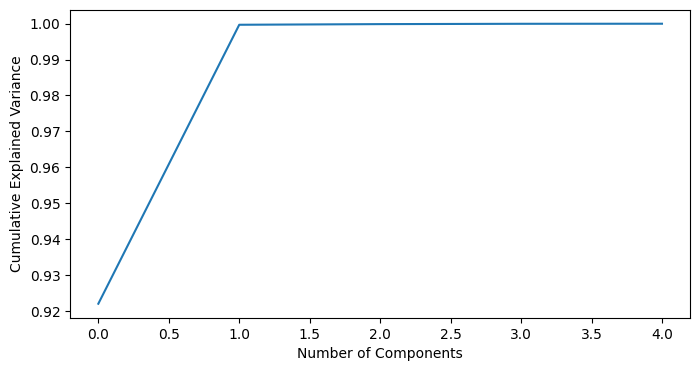

Gradient Boosting Validation MSE: 289014.790692975
Gradient Boosting Validation MAE: 341.82688626799063
Gradient Boosting Validation R²: 0.840501209268048
XGBoost Validation MSE: 288955.1248948309
XGBoost Validation MAE: 342.6389517231511
XGBoost Validation R²: 0.8405341370729857
Test predictions have been saved to 'test_predictions.csv'.


In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# Load your train and test datasets
train_df = pd.read_csv('train.csv')  # Replace with your train file path
test_df = pd.read_csv('test.csv')  # Replace with your test file path

# Replace 'target_column' with the actual target column name in your dataset
X_train = train_df.drop(['id','yield', 'Row#'], axis=1)
y_train = train_df['yield']

X_test = test_df.drop(['id', 'Row#'], axis=1, errors='ignore')


# Split train set into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 1. Feature Selection using Random Forest Importance
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(X_train_split, y_train_split)

# Use SelectFromModel to choose features above a threshold
select_model = SelectFromModel(rf_selector, threshold="median")
X_train_split_selected = select_model.transform(X_train_split)
X_val_split_selected = select_model.transform(X_val_split)
X_test_selected = select_model.transform(X_test)

# Dynamically set n_components based on the selected features
n_selected_features = X_train_split_selected.shape[1]
n_components = min(n_selected_features, 5)  # Adjust based on the number of selected features

# 2. Dimensionality Reduction with PCA
pca = PCA(n_components=n_components)
X_train_split_pca = pca.fit_transform(X_train_split_selected)
X_val_split_pca = pca.transform(X_val_split_selected)
X_test_pca = pca.transform(X_test_selected)

# Explained variance plot
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Train Gradient Boosting and XGBoost on selected and transformed features

# Gradient Boosting Regressor with reduced features
gb_model = GradientBoostingRegressor(
    n_estimators=150,  
    learning_rate=0.05,  
    max_depth=4,  
    min_samples_split=5,  
    min_samples_leaf=4,  
    random_state=42
)

# XGBoost Regressor with reduced features
xgb_model = XGBRegressor(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=4,
    reg_alpha=0.1,  
    reg_lambda=0.1,  
    random_state=42
)

# Train models
gb_model.fit(X_train_split_pca, y_train_split)
xgb_model.fit(X_train_split_pca, y_train_split)

# Make predictions on validation set
gb_val_predictions = gb_model.predict(X_val_split_pca)
xgb_val_predictions = xgb_model.predict(X_val_split_pca)

# Evaluate on validation set
gb_val_mse = mean_squared_error(y_val_split, gb_val_predictions)
gb_val_mae = mean_absolute_error(y_val_split, gb_val_predictions)
gb_val_r2 = r2_score(y_val_split, gb_val_predictions)

xgb_val_mse = mean_squared_error(y_val_split, xgb_val_predictions)
xgb_val_mae = mean_absolute_error(y_val_split, xgb_val_predictions)
xgb_val_r2 = r2_score(y_val_split, xgb_val_predictions)

# Print evaluation metrics
print("Gradient Boosting Validation MSE:", gb_val_mse)
print("Gradient Boosting Validation MAE:", gb_val_mae)
print("Gradient Boosting Validation R²:", gb_val_r2)

print("XGBoost Validation MSE:", xgb_val_mse)
print("XGBoost Validation MAE:", xgb_val_mae)
print("XGBoost Validation R²:", xgb_val_r2)

# Generate predictions on test set
gb_test_predictions = gb_model.predict(X_test_pca)
xgb_test_predictions = xgb_model.predict(X_test_pca)

# Save predictions to CSV
test_predictions_df = pd.DataFrame({
    'id': test['id'],
    'XGBoost_Predictions': xgb_test_predictions
})

test_predictions_df1 = pd.DataFrame({
    'id': test['id'],
    'GradientBoosting_Predictions': gb_test_predictions
})

# Save the predictions to a CSV file
test_predictions_df.to_csv('test_predictions2.csv', index=False)
test_predictions_df1.to_csv('test_predictions3.csv', index=False)

print("Test predictions have been saved to 'test_predictions.csv'.")


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Step 1: Select best features using Random Forest Feature Importance (this part remains the same)
def select_best_features_using_importance(X, y, n_estimators=200, max_depth=6, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train, y_train)
    
    # Get feature importance
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Features sorted by importance:")
    print(feature_importance_df)
    
    # Select top features (you can decide how many to select)
    selected_features = feature_importance_df['Feature'].head(8)  # Selecting top 5 features
    return selected_features

# Step 2: Train a model using selected features with Cross-Validation
def train_model_with_selected_features_cv(X, y, selected_features, test=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]
    
    # scaler = StandardScaler()
    # X_scaled = scaler.fit_transform(X_selected)

    # Select model type
    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=120, learning_rate=0.0, max_depth=4, random_state=42)
    else:
        raise ValueError("Unsupported model type")

    # Perform 5-Fold Cross-Validation
    cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_absolute_error')

    # Since the scoring returns negative MAE, we'll negate it to show positive values
    print(f"\nCross-validated MAE (5-Fold): {np.mean(-cv_scores):.4f}")
    
    # Fit the model on the entire dataset
    model.fit(X_selected, y)
    
    # Predict on test (optional)
    if test is not None:
        X_test_scaled = scaler.transform(test[selected_features])
        testPredictions = model.predict(X_test_scaled)
        
        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })
        
        output_file = 'submission.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# Example usage
X = train[features_to_use]  # All features initially
y = train['yield']

# Step 1: Select best features using feature importance
selected_features = select_best_features_using_importance(X, y)

# Step 2: Train a model with cross-validation using those selected features
train_model_with_selected_features_cv(X, y, selected_features, test=test, idTest=test['id'])

In [67]:
features_to_use = list(train.columns)
features_to_use.remove('id')
features_to_use.remove('yield')
features_to_use.remove('Row#')

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Step 2: Train a model using selected features with Cross-Validation
def train_model_with_selected_features_cv(X, y, selected_features, test=None, idTest=None):
    X_selected = X[selected_features]

    # Create a pipeline with scaling and model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor())
    ])

    # Define hyperparameter grid for tuning
    param_grid = {
        'model__n_estimators': [50, 100, 120],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 4, 5],
        'model__min_samples_split': [2, 5, 10],
        'model__subsample': [0.8, 1.0],  # Sample fraction
    }

    # Use GridSearchCV for hyperparameter tuning with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_selected, y)

    print(f"Best parameters: {grid_search.best_params_}")

    # Cross-validated MAE
    cv_scores = -grid_search.best_score_
    print(f"\nCross-validated MAE (5-Fold): {cv_scores:.4f}")

    # Fit the best model on the entire dataset
    best_model = grid_search.best_estimator_
    best_model.fit(X_selected, y)

    # Predict on test (optional)
    if test is not None:
        X_test_selected = test[selected_features]
        testPredictions = best_model.predict(X_test_selected)

        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })

        output_file = 'submission.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# Example usage
X = train[features_to_use]  # All features initially
y = train['yield']

# Step 1: Select best features using feature importance
selected_features = select_best_features_using_importance(X, y)

# Step 2: Train a model with cross-validation using those selected features
train_model_with_selected_features_cv(X, y, selected_features, test=test, idTest=test['id'])


Features sorted by importance:
                 Feature  Importance
13              fruitset    0.891302
15                 seeds    0.101976
14             fruitmass    0.002991
5       MaxOfUpperTRange    0.000654
8       MaxOfLowerTRange    0.000590
9       MinOfLowerTRange    0.000560
7   AverageOfUpperTRange    0.000470
10  AverageOfLowerTRange    0.000435
6       MinOfUpperTRange    0.000324
3                andrena    0.000157
4                  osmia    0.000140
12    AverageRainingDays    0.000136
11           RainingDays    0.000094
1               honeybee    0.000080
2                bumbles    0.000060
0              clonesize    0.000031


F:\MTech_IIITD\pyEnv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__min_samples_split': 2, 'model__n_estimators': 120, 'model__subsample': 0.8}

Cross-validated MAE (5-Fold): 247.9867
Predictions saved to submission.csv


In [79]:
26

Features sorted by importance:
                 Feature  Importance
13              fruitset    0.894028
15                 seeds    0.099063
14             fruitmass    0.002864
7   AverageOfUpperTRange    0.000619
5       MaxOfUpperTRange    0.000613
8       MaxOfLowerTRange    0.000605
10  AverageOfLowerTRange    0.000573
9       MinOfLowerTRange    0.000504
6       MinOfUpperTRange    0.000374
3                andrena    0.000162
12    AverageRainingDays    0.000140
4                  osmia    0.000125
11           RainingDays    0.000096
1               honeybee    0.000088
2                bumbles    0.000083
0              clonesize    0.000063
'feature1' does not exist in DataFrame.
'feature2' does not exist in DataFrame.
Best parameters: {'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 150, 'model__subsample': 0.8}

Cross-validated MAE (5-Fold): 247.9329
'feature1' does not exist in DataFrame.
'feature2' does not exis

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Example feature engineering function with checks
def feature_engineering(X):
    if 'feature1' in X.columns:
        X['feature1_squared'] = X['feature1'] ** 2
    else:
        print("'feature1' does not exist in DataFrame.")

    if 'feature2' in X.columns:
        X['feature2_log'] = np.log1p(X['feature2'])
    else:
        print("'feature2' does not exist in DataFrame.")

    return X

# Adjusted select_best_features_using_importance function
def select_best_features_using_importance(X, y, n_estimators=200, max_depth=6, random_state=42, n_features=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train_scaled, y_train)
    
    # Get feature importance
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Features sorted by importance:")
    print(feature_importance_df)
    
    # Select top features
    selected_features = feature_importance_df['Feature'].head(n_features).values
    return selected_features

# Adjusted train_model_with_selected_features_cv function
def train_model_with_selected_features_cv(X, y, selected_features, test=None, idTest=None):
    # Feature engineering
    X = feature_engineering(X)

    # Create a pipeline with scaling and model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly_features', PolynomialFeatures(include_bias=False)),  # Add polynomial features
        ('model', GradientBoostingRegressor())
    ])

    # Define hyperparameter grid for tuning
    param_grid = {
        'model__n_estimators': [50, 100, 150],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__max_depth': [3, 4, 5],
        'model__min_samples_split': [2, 5, 10],
        'model__subsample': [0.8, 1.0],
    }

    # Use GridSearchCV for hyperparameter tuning with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X[selected_features], y)

    print(f"Best parameters: {grid_search.best_params_}")

    # Evaluate the best model using cross-validation
    best_model = grid_search.best_estimator_
    cv_scores = cross_val_score(best_model, X[selected_features], y, cv=5, scoring='neg_mean_absolute_error')
    print(f"\nCross-validated MAE (5-Fold): {-np.mean(cv_scores):.4f}")

    # Fit the best model on the entire dataset
    best_model.fit(X[selected_features], y)

    # Predict on test (optional)
    if test is not None:
        test = feature_engineering(test)  # Apply feature engineering to test set
        X_test_selected = test[selected_features]
        testPredictions = best_model.predict(X_test_selected)

        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })

        output_file = 'submission1.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

    # Additional metrics
    y_pred = best_model.predict(X[selected_features])
    print(f"MAE: {mean_absolute_error(y, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y, y_pred):.4f}")
    print(f"R^2: {r2_score(y, y_pred):.4f}")

# Example usage
X = train[features_to_use]  # All features initially
y = train['yield']

# Step 1: Select best features using feature importance (increased n_features)
selected_features = select_best_features_using_importance(X, y, n_features=10)

# Step 2: Train a model with cross-validation using those selected features
train_model_with_selected_features_cv(X, y, selected_features, test=test, idTest=test['id'])


Features sorted by importance:
                 Feature  Importance
13              fruitset    0.891302
15                 seeds    0.101976
14             fruitmass    0.002991
5       MaxOfUpperTRange    0.000654
8       MaxOfLowerTRange    0.000590
9       MinOfLowerTRange    0.000560
7   AverageOfUpperTRange    0.000470
10  AverageOfLowerTRange    0.000435
6       MinOfUpperTRange    0.000324
3                andrena    0.000157
4                  osmia    0.000140
12    AverageRainingDays    0.000136
11           RainingDays    0.000094
1               honeybee    0.000080
2                bumbles    0.000060
0              clonesize    0.000031
'feature1' does not exist in DataFrame.
'feature2' does not exist in DataFrame.
